# 小世界网络

## 1、K-近邻规则网络的生成与可视化

In [1]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 自己实现一个最近邻规则网络
def regular_graph(n,k):
    G = nx.Graph()
    nodes = list(range(n))  # 节点标签设置为0到n-1
    # 每个节点与周围k/2个邻近节点相连
    for j in range(1,k//2+1):  # //是取整除-返回商的整数部分（向下取整）
        targets = nodes[j:] + nodes[0:j]
        G.add_edges_from(zip(nodes,targets))
    return G    

In [7]:
a = [1,2,3,4]
b = [6,7,8,9]
list(zip(a,b))
tuple(zip(a,b))

((1, 6), (2, 7), (3, 8), (4, 9))

Text(0.5, 1.0, 'K-regular')

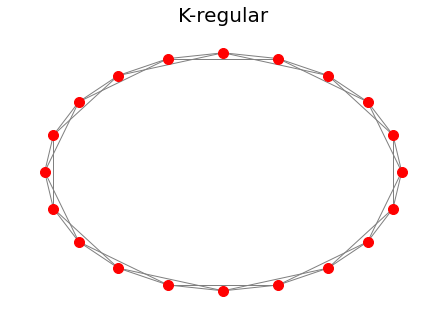

In [8]:
n = 20  # 网络节点总数
k = 4  # 近邻节点数
color_list = ["red","gray"]

G = regular_graph(n,k)
pos = nx.circular_layout(G)
nx.draw(G,pos,node_size=100,node_color=color_list[0],edge_color=color_list[1])
plt.title("K-regular",fontsize=20)


## 2、WS小世界网络的生成与可视化

Text(0.5, 1.0, 'random')

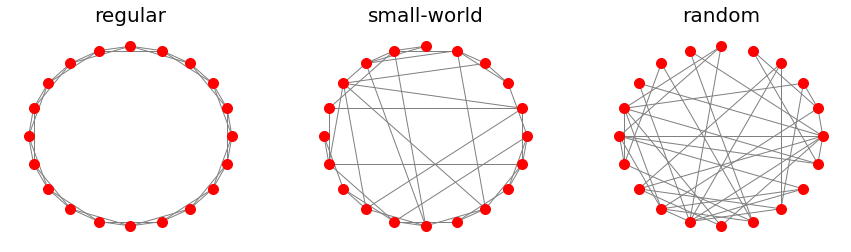

In [10]:
plt.figure(figsize=(15,4))
# 绘制规则网络
p = 0
G1 = nx.watts_strogatz_graph(n,k,p)
plt.subplot(131)
pos1 = nx.circular_layout(G1)
nx.draw(G1,pos1,node_size=100,node_color=color_list[0],edge_color=color_list[1])
plt.title("regular",fontsize=20)

# 绘制WS小世界网络
p = 0.3
G2 = nx.watts_strogatz_graph(n,k,p)
plt.subplot(132)
pos2 = nx.circular_layout(G2)
nx.draw(G2,pos2,node_size=100,node_color=color_list[0],edge_color=color_list[1])
plt.title("small-world",fontsize=20)

# 绘制随机网络
p = 1
G3 = nx.watts_strogatz_graph(n,k,p)
plt.subplot(133)
pos3 = nx.circular_layout(G3)
nx.draw(G3,pos3,node_size=100,node_color=color_list[0],edge_color=color_list[1])
plt.title("random",fontsize=20)

## 3、NW小世界网络的生成与可视化

Text(0.5, 1.0, 'complete')

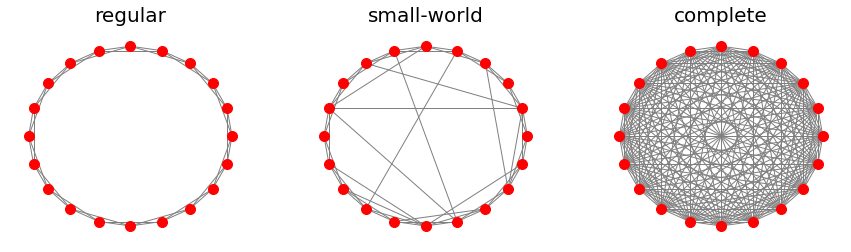

In [11]:
plt.figure(figsize=(15,4))
# 绘制规则网络
p = 0
G1 = nx.watts_strogatz_graph(n,k,p)
plt.subplot(131)
pos1 = nx.circular_layout(G1)
nx.draw(G1,pos1,node_size=100,node_color=color_list[0],edge_color=color_list[1])
plt.title("regular",fontsize=20)

# 绘制NW小世界网络
p = 0.3
G2 = nx.newman_watts_strogatz_graph(n,k,p)
plt.subplot(132)
pos2 = nx.circular_layout(G2)
nx.draw(G2,pos2,node_size=100,node_color=color_list[0],edge_color=color_list[1])
plt.title("small-world",fontsize=20)

# 绘制完全网络：加边概率为1
G3 = nx.complete_graph(n)
plt.subplot(133)
pos3 = nx.circular_layout(G3)
nx.draw(G3,pos3,node_size=100,node_color=color_list[0],edge_color=color_list[1])
plt.title("complete",fontsize=20)

## 4、WS小世界网络的度分布

In [12]:
import numpy as np

In [14]:
# 定义求度分布的函数
def get_pdf(G,k):
    N = len(G.nodes())
    
    Pk = []
    for ki in k:
        c = 0
        for i in G.nodes():
            if G.degree(i) == ki:
                c +=1
        Pk.append(c/N)
    return Pk

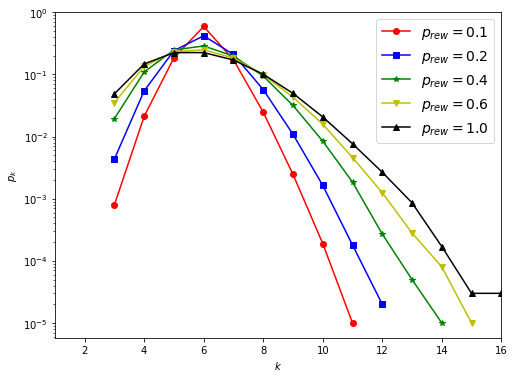

In [17]:
# 以N = 1000，K = 6的WS小世界模型的数值模拟结果为例
N = 1000
K = 6
samples = 100 # 统计平均次数（100次取平均）
p_rew = [0.1,0.2,0.4,0.6,1.0]
plt.figure(figsize=(8,6))
symbols = ["ro-","bs-","g*-","yv-","k^-"]
# 为了便于统计平均，指定区间[1,16]
kmin,kmax = 1,16
x = list(range(kmin,kmax+1))
c = 0
for p in p_rew:
    s = np.zeros(kmax-kmin+1)
    for i in range(samples):
        G = nx.watts_strogatz_graph(N,K,p)
        y = get_pdf(G,x)
        s += np.array(y)
        
    s = list(s)
    # 剔除概率为0的点：这里也可以用numpy的函数直接剔除
    new_x = []
    new_y = []
    for i in range(len(x)):
        if s[i]!=0:
            new_x.append(x[i])
            new_y.append(s[i])
    plt.plot(new_x,np.array(new_y)/samples,symbols[c],label="$p_{rew} = $" + str(p))
    c += 1
    
plt.legend(loc = 0,fontsize =14)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.yscale("log")
plt.xlim([kmin,kmax])
plt.savefig("pdf_WS.png",dpi=600)

## 5、WS小世界网络的“小世界”与“高集聚”特性

In [1]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 设置初始参数
N,K = 1000,10
samples = 10
p_rew = np.logspace(0,4,10)/10000
p_rew

array([1.00000000e-04, 2.78255940e-04, 7.74263683e-04, 2.15443469e-03,
       5.99484250e-03, 1.66810054e-02, 4.64158883e-02, 1.29154967e-01,
       3.59381366e-01, 1.00000000e+00])

In [8]:
# 平均距离与平均集聚系数
C = []
CT = [] # 理论近似值：{[3(K-2)]/[4(K-1)]}*(1-p)^3
L = []
for p in p_rew:
    s1 = 0
    s2 = 0
    for i in range(samples):
        G = nx.connected_watts_strogatz_graph(N,K,p)
        # 为了防止在计算平均距离时报错，最好改用生成连通的WS小世界网络函数connected_watts_strogatz_graph()
        s1 += nx.average_clustering(G)
        s2 += nx.average_shortest_path_length(G)
        
    ct = (3 * (K - 2) / (4 * (K - 1))) * ((1 - p) ** 3)
    CT.append(ct)
    C.append(s1/samples)
    L.append(s2/samples)

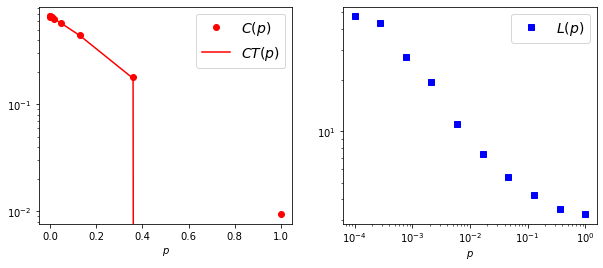

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(p_rew,C,"ro",label="$C(p)$")
plt.plot(p_rew,CT,"r-",label="$CT(p)$")
plt.legend(loc=0,fontsize=14)
plt.xlabel("$p$")
plt.yscale("log")

plt.subplot(122)
plt.plot(p_rew,L,"bs",label="$L(p)$")
plt.legend(loc=0,fontsize=14)
plt.xlabel("$p$")
plt.xscale("log")
plt.yscale("log")

plt.savefig("C_L.png",dpi=600)

In [10]:
# 初始规则网络的平均集聚系数和平均距离
G0 = nx.watts_strogatz_graph(N,K,0)
C0 = nx.average_clustering(G0)
L0 = nx.average_shortest_path_length(G0)

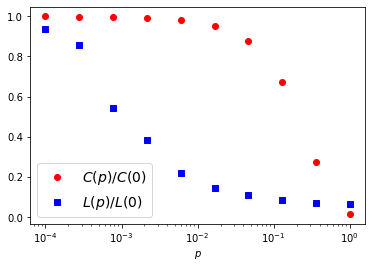

In [11]:
plt.figure(figsize=(6,4))
plt.plot(p_rew,np.array(C)/C0,"ro",label="$C(p)/C(0)$")
plt.plot(p_rew,np.array(L)/L0,"bs",label="$L(p)/L(0)$")
plt.legend(loc=0,fontsize=14)
plt.xlabel("$p$")
plt.xscale("log")
plt.savefig("C_L2.png",dpi=600)